<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Orders-table" data-toc-modified-id="Orders-table-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Orders table</a></span></li><li><span><a href="#Order_products-table" data-toc-modified-id="Order_products-table-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Order_products table</a></span></li><li><span><a href="#Products-table" data-toc-modified-id="Products-table-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Products table</a></span></li><li><span><a href="#Aisles-table" data-toc-modified-id="Aisles-table-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Aisles table</a></span></li><li><span><a href="#Departments-table" data-toc-modified-id="Departments-table-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Departments table</a></span></li></ul></li></ul></li><li><span><a href="#KPIs" data-toc-modified-id="KPIs-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>KPIs</a></span><ul class="toc-item"><li><span><a href="#Daily-active-users" data-toc-modified-id="Daily-active-users-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Daily active users</a></span></li><li><span><a href="#Lifetime-value" data-toc-modified-id="Lifetime-value-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Lifetime value</a></span></li><li><span><a href="#Average-revenue-per-user" data-toc-modified-id="Average-revenue-per-user-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Average revenue per user</a></span></li></ul></li><li><span><a href="#Recommendations" data-toc-modified-id="Recommendations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Recommendations</a></span></li></ul></div>

# Introduction

In [2]:
# Import needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('talk')
import sqlite3

In [3]:
# Set up connection to the database
conn = sqlite3.connect('instacart.db')
cur = conn.cursor()

## EDA

### Orders table

In [23]:
# Query the database and load the data
cur.execute("""
    SELECT *
    FROM orders
            ;""")
orders = pd.DataFrame(cur.fetchall())
orders.columns = [x[0] for x in cur.description]
orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2168274,2,1,2,11,NaN
1,1501582,2,2,5,10,10.0
2,1901567,2,3,1,10,3.0
3,738281,2,4,2,10,8.0
4,1673511,2,5,3,11,8.0


/Users/jennykreiger/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jennykreiger/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


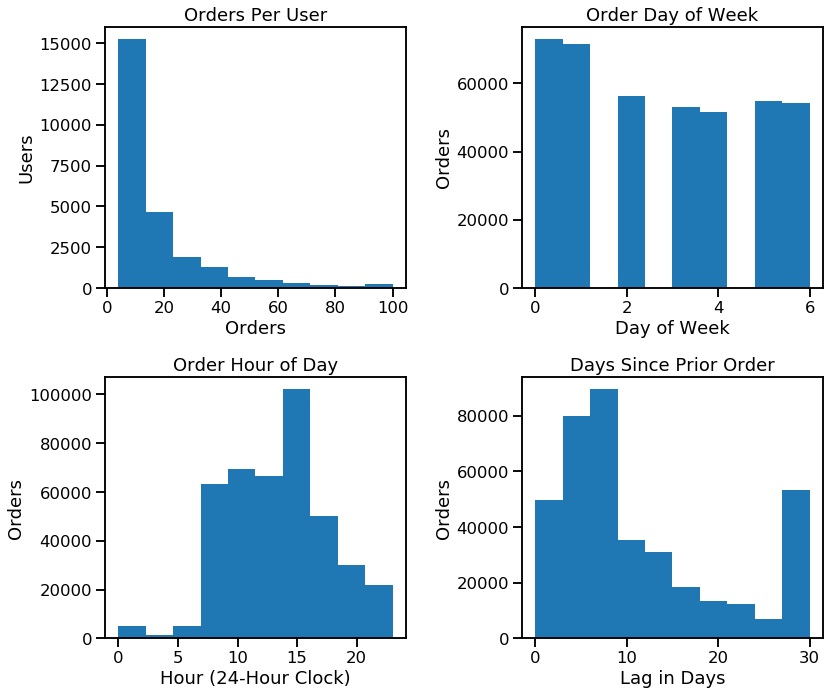

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))

ax0 = axes[0,0]
ax0.hist(orders.user_id.value_counts())
ax0.set_title('Orders Per User')
ax0.set_xlabel('Orders')
ax0.set_ylabel('Users')

ax1 = axes[0,1]
ax1.hist(orders.order_dow)
ax1.set_title('Order Day of Week')
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Orders')

ax2 = axes[1,0]
ax2.hist(orders.order_hour_of_day)
ax2.set_title('Order Hour of Day')
ax2.set_xlabel('Hour (24-Hour Clock)')
ax2.set_ylabel('Orders')

ax3 = axes[1,1]
ax3.hist(orders.days_since_prior_order)
ax3.set_title('Days Since Prior Order')
ax3.set_xlabel('Lag in Days')
ax3.set_ylabel('Orders')

plt.tight_layout()
plt.show();


### Order_products table

In [27]:
# Query the database and load the data
cur.execute("""
    SELECT *
    FROM order_products
    LIMIT 10000
            ;""")
order_products = pd.DataFrame(cur.fetchall())
order_products.columns = [x[0] for x in cur.description]
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


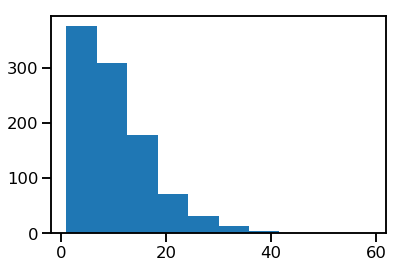

In [34]:
plt.hist(order_products.order_id.value_counts());

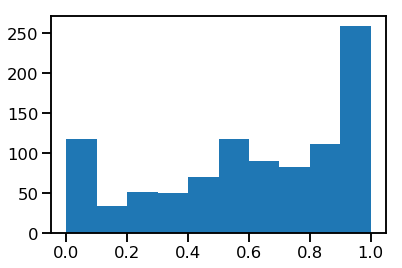

In [37]:
plt.hist(order_products.groupby('order_id')['reordered'].mean());

### Products table

In [28]:
# Query the database and load the data
cur.execute("""
    SELECT *
    FROM products
            ;""")
products = pd.DataFrame(cur.fetchall())
products.columns = [x[0] for x in cur.description]
products.head()

,index,product_id,product_name,aisle_id,department_id
0,0,1,Chocolate Sandwich Cookies,61,19
1,1,2,All-Seasons Salt,104,13
2,2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,4,5,Green Chile Anytime Sauce,5,13


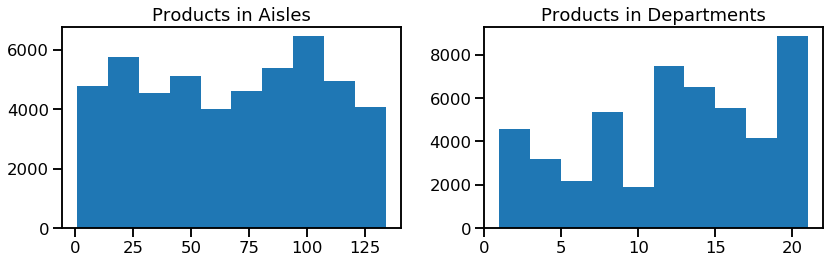

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

ax0 = axes[0]
ax0.hist(products.aisle_id)
ax0.set_title('Products in Aisles')

ax1 = axes[1]
ax1.hist(products.department_id)
ax1.set_title('Products in Departments')

plt.tight_layout()
plt.show();

In [41]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 5 columns):
index            49688 non-null int64
product_id       49688 non-null int64
product_name     49688 non-null object
aisle_id         49688 non-null int64
department_id    49688 non-null int64
dtypes: int64(4), object(1)
memory usage: 1.9+ MB


Aside from the questions below about number of products per aisle or dept, what else can we ask here? 

### Aisles table

In [30]:
# Query the database and load the data
cur.execute("""
    SELECT *
    FROM aisles
            ;""")
aisles = pd.DataFrame(cur.fetchall())
aisles.columns = [x[0] for x in cur.description]
aisles.head()

,index,aisle_id,aisle
0,0,1,prepared soups salads
1,1,2,specialty cheeses
2,2,3,energy granola bars
3,3,4,instant foods
4,4,5,marinades meat preparation


In [43]:
aisles[aisles['aisle_id'] == 100]

,index,aisle_id,aisle
99,99,100,missing


In [40]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 3 columns):
index       134 non-null int64
aisle_id    134 non-null int64
aisle       134 non-null object
dtypes: int64(2), object(1)
memory usage: 3.3+ KB


In [44]:
[name for name in aisles.aisle]

['prepared soups salads',
 'specialty cheeses',
 'energy granola bars',
 'instant foods',
 'marinades meat preparation',
 'other',
 'packaged meat',
 'bakery desserts',
 'pasta sauce',
 'kitchen supplies',
 'cold flu allergy',
 'fresh pasta',
 'prepared meals',
 'tofu meat alternatives',
 'packaged seafood',
 'fresh herbs',
 'baking ingredients',
 'bulk dried fruits vegetables',
 'oils vinegars',
 'oral hygiene',
 'packaged cheese',
 'hair care',
 'popcorn jerky',
 'fresh fruits',
 'soap',
 'coffee',
 'beers coolers',
 'red wines',
 'honeys syrups nectars',
 'latino foods',
 'refrigerated',
 'packaged produce',
 'kosher foods',
 'frozen meat seafood',
 'poultry counter',
 'butter',
 'ice cream ice',
 'frozen meals',
 'seafood counter',
 'dog food care',
 'cat food care',
 'frozen vegan vegetarian',
 'buns rolls',
 'eye ear care',
 'candy chocolate',
 'mint gum',
 'vitamins supplements',
 'breakfast bars pastries',
 'packaged poultry',
 'fruit vegetable snacks',
 'preserved dips spreads

- What aisles contain the most products? Least?
- What aisles do people order from the most?

### Departments table

In [33]:
# Query the database and load the data
cur.execute("""
    SELECT *
    FROM departments
            ;""")
departments = pd.DataFrame(cur.fetchall())
departments.columns = [x[0] for x in cur.description]
departments.head()

,index,department_id,department
0,0,1,frozen
1,1,2,other
2,2,3,bakery
3,3,4,produce
4,4,5,alcohol


In [38]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
index            21 non-null int64
department_id    21 non-null int64
department       21 non-null object
dtypes: int64(2), object(1)
memory usage: 632.0+ bytes


In [39]:
[name for name in departments.department]

['frozen',
 'other',
 'bakery',
 'produce',
 'alcohol',
 'international',
 'beverages',
 'pets',
 'dry goods pasta',
 'bulk',
 'personal care',
 'meat seafood',
 'pantry',
 'breakfast',
 'canned goods',
 'dairy eggs',
 'household',
 'babies',
 'snacks',
 'deli',
 'missing']

- What are the various departments?
- Which departments contain the most items?
- Which departments do people order from the most?

# KPIs

- Do people buying stuff for babies buy more items overall? (Hypothesis test: number of products in orders containing baby items v. orders not containing baby items.)
- What about people buying alcohol? Is alcohol part of a larger order, eg for a party, or are people using this as an alcohol delivery service?
- What can we learn about the most active users (e.g., top 1% by number or size of orders?)
- What are the busiest days of week?
- What are the busiest times of day?
- What are the most popular items?
- Does order size vary by day or time? E.g., are people placing smaller orders on weeknights and bigger orders on weekends? (This is a hypothesis test: weeknight order product count v. weekend order product count.)
- Can customers be clustered in any interesting ways? E.g., weekend v. weekday, alcohol consumers, baby product consumers, meat consumers, organic consumers? Features to create: number of orders; average size of order; average time of day; average DOW; average time between orders; has ordered alcohol; has ordered baby stuff; average reorder rate > 50%; 

## Daily active users

# Recommendations